In [2]:
%pip install seaborn
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading dataset
dataset=load_dataset ("lukebarousse/data_jobs")
df= dataset['train'].to_pandas()

#data cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/envs/PROJECT/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_IND=df[(df["job_country"]== "India") & (df["job_title_short"]== "Data Analyst")]


In [4]:
df_DA_IND["job_location"].value_counts().head(10)

job_location
India                             2056
Hyderabad, Telangana, India       1289
Anywhere                          1052
Bengaluru, Karnataka, India        355
Maharashtra, India                 203
Mumbai, Maharashtra, India         133
Pune, Maharashtra, India           119
Gurugram, Haryana, India           108
Chennai, Tamil Nadu, India         106
Secunderabad, Telangana, India      84
Name: count, dtype: int64

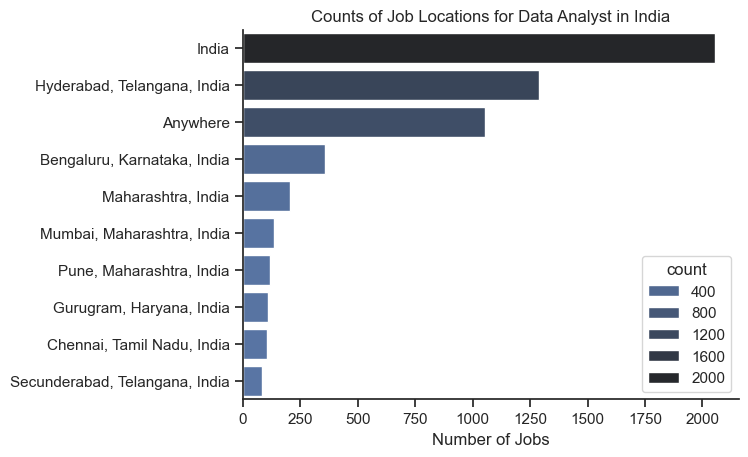

In [5]:
df_plot=df_DA_IND["job_location"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r")
sns.despine()
plt.title("Counts of Job Locations for Data Analyst in India")
plt.xlabel ("Number of Jobs")
plt.ylabel("")
plt.show()


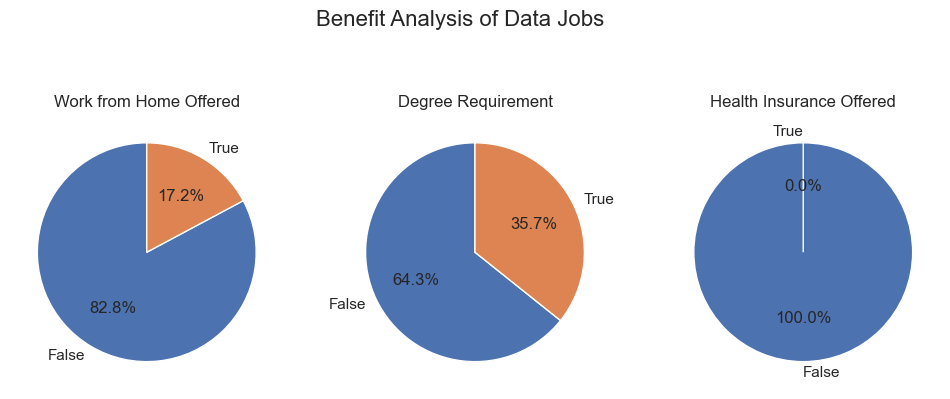

In [6]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': "Degree Requirement",
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_IND[column].value_counts().reindex([False, True], fill_value=0)
    
    ax[i].pie(counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()


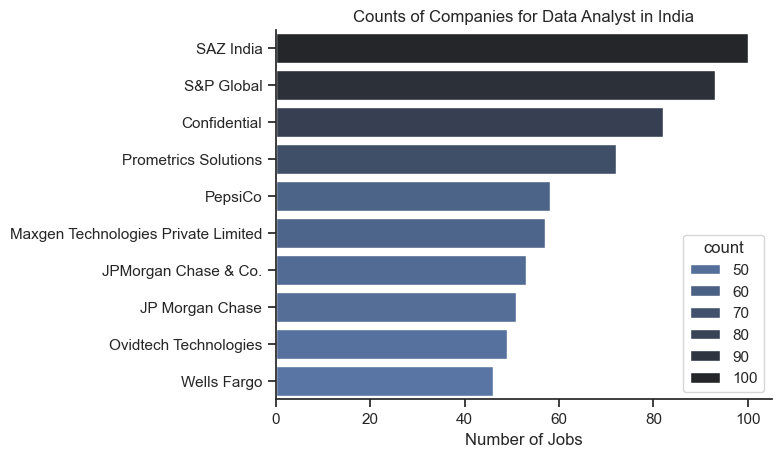

In [7]:
df_plot=df_DA_IND["company_name"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r")
sns.despine()
plt.title("Counts of Companies for Data Analyst in India")
plt.xlabel ("Number of Jobs")
plt.ylabel("")
plt.show()
